In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

ID      Country  Year      Status  Life expectancy  \
0  Af04604195  Afghanistan  2013  Developing             59.9   
1  Af04794049  Afghanistan  2000  Developing             54.8   
2  Af07527693  Afghanistan  2006  Developing             57.3   
3  Af11267444  Afghanistan  2010  Developing             58.8   
4  Af12688448  Afghanistan  2005  Developing             57.3   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            268.0             66     0.01               73.219243   
1            321.0             88     0.01               10.424960   
2            295.0             84     0.03               17.171518   
3            279.0             74     0.01               79.679367   
4            291.0             85     0.02                1.388648   

   Hepatitis B  ...  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0         64.0  ...   62.0               8.13        64.0       0.1   
1         62.0  ...   24.0               8.20        24.0       0.1   
2         64.0  ...   58.0               7.43        58.0       0.1   
3         66.0  ...   66.0               9.20        66.0       0.1   
4         66.0  ...   58.0               8.70        58.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  631.744976  31731688.0                  17.7                17.7   
1  114.560000    293756.0                   2.3                 2.5   
2  272.563770   2589345.0                  19.2                19.3   
3  553.328940   2883167.0                  18.4                18.4   
4   25.294130    257798.0                  19.3                19.5   

   Income composition of resources  Schooling  
0                            0.470        9.9  
1                            0.338        5.5  
2                            0.405        8.1  
3                            0.448        9.2  
4                            0.396        7.9  

[5 rows x 23 columns]

In [5]:
train.columns

Index(['ID', 'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
test.head()

ID               Country  Year      Status  Adult Mortality  \
0  Sy75324907  Syrian Arab Republic  2006  Developing            123.0   
1  Cr10129453               Croatia  2006   Developed            113.0   
2  Mo67025598            Montenegro  2007  Developing            125.0   
3  Ba38246112               Bahrain  2014  Developing              7.0   
4  Ke57254548                 Kenya  2000  Developing            428.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0              8     0.97              122.652333         83.0      517  ...   
1              0    11.83             1555.651986          NaN        1  ...   
2              0     4.98              678.518894          9.0        0  ...   
3              0     1.57              367.255674         98.0       46  ...   
4             77     1.51                0.681686          NaN    21002  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS           GDP  Population  \
0   83.0               3.78         8.0       0.1   1762.246170  18914977.0   
1   96.0               6.95        96.0       0.1  11363.418450       444.0   
2   92.0               6.74        92.0       0.1   5957.145693    615875.0   
3   98.0               4.98        98.0       0.1  24983.379200         NaN   
4    8.0               4.68        82.0      18.1     43.979713   3145483.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                   6.4                 6.3                            0.636   
1                   1.8                 1.8                            0.783   
2                   2.1                 2.2                            0.762   
3                   6.1                 6.0                            0.820   
4                   9.2                 9.1                            0.448   

   Schooling  
0       11.4  
1       13.9  
2       13.6  
3       14.5  
4        8.4  

[5 rows x 22 columns]

In [7]:
train.shape, test.shape

((2350, 23), (588, 22))

In [8]:
 train.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2350.000000      2350.000000      2342.000000    2350.000000   
mean   2007.537447        69.275404       165.824082      28.793191   
std       4.611986         9.573065       125.273598     111.836006   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.300000        74.000000       0.000000   
50%    2008.000000        72.200000       144.000000       3.000000   
75%    2012.000000        75.700000       227.750000      20.750000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2192.000000             2350.000000  1911.000000    2350.000000   
mean      4.593271              720.521353    81.141811    2318.703404   
std       4.034828             1952.616462    24.821252   11589.618520   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.850000                5.491010    77.000000       0.000000   
50%       3.760000               65.611455    92.000000      16.000000   
75%       7.622500              441.534144    97.000000     356.250000   
max      17.310000            19099.045060    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2323.000000        2350.000000  2336.000000        2165.000000   
mean     38.556780          40.094468    82.693921           5.936185   
std      20.073857         152.939537    23.363327           2.509597   
min       1.400000           0.000000     3.000000           0.650000   
25%      19.400000           0.000000    78.000000           4.260000   
50%      43.900000           4.000000    93.000000           5.730000   
75%      56.200000          26.000000    97.000000           7.500000   
max      87.300000        2500.000000    99.000000          17.240000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2336.000000  2350.000000    2005.000000  1.834000e+03   
mean     82.376712     1.787064    7384.623471  1.192254e+07   
std      23.793441     5.266324   14189.942344  5.480387e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     462.517913  1.943552e+05   
50%      93.000000     0.100000    1774.929100  1.416448e+06   
75%      97.000000     0.800000    5859.915622  7.442611e+06   
max      99.000000    50.600000  115761.577000  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2323.000000         2323.000000   
mean               4.800215            4.838269   
std                4.403585            4.482891   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.100000            7.100000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2219.000000  2221.000000  
mean                          0.631084    12.028140  
std                           0.207573     3.346762  
min                           0.000000     0.000000  
25%                           0.497000    10.100000  
50%                           0.682000    12.400000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [9]:
test.describe()

Year  Adult Mortality  infant deaths     Alcohol  \
count   588.000000       586.000000     588.000000  552.000000   
mean   2007.443878       160.689420      36.341837    4.640942   
std       4.624420       120.306158     139.587066    4.124987   
min    2000.000000         1.000000       0.000000    0.010000   
25%    2003.000000        69.000000       0.000000    0.950000   
50%    2007.000000       141.000000       3.000000    3.725000   
75%    2011.000000       227.750000      26.250000    7.977500   
max    2015.000000       715.000000    1800.000000   17.870000   

       percentage expenditure  Hepatitis B        Measles         BMI  \
count              588.000000   474.000000     588.000000  581.000000   
mean               809.110761    80.128692    2822.804422   37.379518   
std               2123.408651    26.060068   10964.956359   19.913699   
min                  0.000000     2.000000       0.000000    1.000000   
25%                  2.717652    76.000000       0.000000   18.800000   
50%                 62.695106    92.000000      17.500000   41.400000   
75%                432.321465    97.000000     372.750000   56.000000   
max              19479.911610    99.000000  131441.000000   79.300000   

       under-five deaths       Polio  Total expenditure  Diphtheria  \
count         588.000000  583.000000         547.000000  583.000000   
mean           49.794218   81.974271           5.946124   82.113208   
std           187.414890   23.697065           2.455425   23.426808   
min             0.000000    3.000000           0.370000    3.000000   
25%             0.000000   77.000000           4.290000   77.000000   
50%             4.000000   93.000000           5.800000   93.000000   
75%            36.250000   97.000000           7.465000   97.000000   
max          2400.000000   99.000000          17.600000   99.000000   

         HIV/AIDS            GDP    Population  thinness  1-19 years  \
count  588.000000     485.000000  4.520000e+02             581.00000   
mean     1.562415    7890.504183  1.612449e+07               4.99759   
std      4.240632   14604.993842  8.147891e+07               4.48635   
min      0.100000       3.685949  3.600000e+01               0.10000   
25%      0.100000     465.119887  2.231182e+05               1.60000   
50%      0.100000    1741.142552  1.323676e+06               3.50000   
75%      0.800000    6256.559260  7.245294e+06               7.50000   
max     43.500000  119172.741800  1.161978e+09              27.50000   

       thinness 5-9 years  Income composition of resources   Schooling  
count          581.000000                       552.000000  554.000000  
mean             4.998451                         0.613348   11.851083  
std              4.613042                         0.223427    3.406595  
min              0.100000                         0.000000    0.000000  
25%              1.500000                         0.483750    9.900000  
50%              3.500000                         0.656500   12.100000  
75%              7.400000                         0.778500   14.175000  
max             28.500000                         0.942000   20.600000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2350 non-null   object 
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2350 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [11]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               588 non-null    object 
 1   Country                          588 non-null    object 
 2   Year                             588 non-null    int64  
 3   Status                           588 non-null    object 
 4   Adult Mortality                  586 non-null    float64
 5   infant deaths                    588 non-null    int64  
 6   Alcohol                          552 non-null    float64
 7   percentage expenditure           588 non-null    float64
 8   Hepatitis B                      474 non-null    float64
 9   Measles                          588 non-null    int64  
 10  BMI                              581 non-null    float64
 11  under-five deaths                588 non-null    int64  
 12  Polio                 

In [12]:
 train.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2350.000000      2350.000000      2342.000000    2350.000000   
mean   2007.537447        69.275404       165.824082      28.793191   
std       4.611986         9.573065       125.273598     111.836006   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.300000        74.000000       0.000000   
50%    2008.000000        72.200000       144.000000       3.000000   
75%    2012.000000        75.700000       227.750000      20.750000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2192.000000             2350.000000  1911.000000    2350.000000   
mean      4.593271              720.521353    81.141811    2318.703404   
std       4.034828             1952.616462    24.821252   11589.618520   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.850000                5.491010    77.000000       0.000000   
50%       3.760000               65.611455    92.000000      16.000000   
75%       7.622500              441.534144    97.000000     356.250000   
max      17.310000            19099.045060    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2323.000000        2350.000000  2336.000000        2165.000000   
mean     38.556780          40.094468    82.693921           5.936185   
std      20.073857         152.939537    23.363327           2.509597   
min       1.400000           0.000000     3.000000           0.650000   
25%      19.400000           0.000000    78.000000           4.260000   
50%      43.900000           4.000000    93.000000           5.730000   
75%      56.200000          26.000000    97.000000           7.500000   
max      87.300000        2500.000000    99.000000          17.240000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2336.000000  2350.000000    2005.000000  1.834000e+03   
mean     82.376712     1.787064    7384.623471  1.192254e+07   
std      23.793441     5.266324   14189.942344  5.480387e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     462.517913  1.943552e+05   
50%      93.000000     0.100000    1774.929100  1.416448e+06   
75%      97.000000     0.800000    5859.915622  7.442611e+06   
max      99.000000    50.600000  115761.577000  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2323.000000         2323.000000   
mean               4.800215            4.838269   
std                4.403585            4.482891   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.100000            7.100000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2219.000000  2221.000000  
mean                          0.631084    12.028140  
std                           0.207573     3.346762  
min                           0.000000     0.000000  
25%                           0.497000    10.100000  
50%                           0.682000    12.400000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [13]:
columns = train[['infant deaths', 'Alcohol']]
columns.describe()

infant deaths      Alcohol
count    2350.000000  2192.000000
mean       28.793191     4.593271
std       111.836006     4.034828
min         0.000000     0.010000
25%         0.000000     0.850000
50%         3.000000     3.760000
75%        20.750000     7.622500
max      1800.000000    17.310000

In [14]:
px.histogram(train, x='infant deaths')

In [15]:
px.scatter(x=train['infant deaths'], y=train['Alcohol'])

In [16]:
upper_limit = train['infant deaths'].mean() + 3*train['Alcohol'].std()

print(upper_limit)

lower_limit =  train['infant deaths'].mean() - 3*train['Alcohol'].std()

print(lower_limit)

40.89767637216846
16.68870660655495


In [17]:
train['infant deaths'] = np.where(train['infant deaths'] > upper_limit,

   upper_limit,

   np.where(

       train['infant deaths'] < lower_limit,

       lower_limit,

       train['infant deaths']

   )

)

In [18]:
train.describe()[['infant deaths']]

infant deaths
count    2350.000000
mean       21.555019
std         8.988209
min        16.688707
25%        16.688707
50%        16.688707
75%        20.750000
max        40.897676

In [19]:
train['Alcohol'] = np.where(train['Alcohol'] > upper_limit,

   upper_limit,

   np.where(

       train['Alcohol'] < lower_limit,

       lower_limit,

       train['Alcohol']

   )

)

In [20]:
train.describe()[['Alcohol']]

Alcohol
count  2192.000000
mean     16.689127
std       0.014746
min      16.688707
25%      16.688707
50%      16.688707
75%      16.688707
max      17.310000

In [21]:
 px.scatter(x=train['infant deaths'], y=train['Alcohol'])

In [22]:
columns = train[['percentage expenditure', 'Measles']]
columns.describe()

percentage expenditure        Measles
count             2350.000000    2350.000000
mean               720.521353    2318.703404
std               1952.616462   11589.618520
min                  0.000000       0.000000
25%                  5.491010       0.000000
50%                 65.611455      16.000000
75%                441.534144     356.250000
max              19099.045060  212183.000000

In [23]:
px.scatter(x=train['percentage expenditure'], y=train['Measles'])

In [24]:
upper_limit = train['percentage expenditure'].mean() + 3*train['Measles'].std()

print(upper_limit)

lower_limit =  train['percentage expenditure'].mean() - 3*train['Measles'].std()

print(lower_limit)

35489.376912969776
-34048.334207886146


In [25]:
train['percentage expenditure'] = np.where(train['percentage expenditure'] > upper_limit,

   upper_limit,

   np.where(

       train['percentage expenditure'] < lower_limit,

       lower_limit,

       train['percentage expenditure']

   )

)

In [26]:
train.describe()[['percentage expenditure']]

percentage expenditure
count             2350.000000
mean               720.521353
std               1952.616462
min                  0.000000
25%                  5.491010
50%                 65.611455
75%                441.534144
max              19099.045060

In [27]:
train['Measles'] = np.where(train['Measles'] > upper_limit,

   upper_limit,

   np.where(

       train['Measles'] < lower_limit,

       lower_limit,

       train['Measles']

   )

)

In [28]:
train.describe()[['Measles']]

Measles
count   2350.000000
mean    1644.922956
std     5559.630920
min        0.000000
25%        0.000000
50%       16.000000
75%      356.250000
max    35489.376913

In [29]:
px.scatter(x=train['percentage expenditure'], y=train['Measles'])

In [30]:
columns = train[['under-five deaths', 'HIV/AIDS']]
columns.describe()

under-five deaths     HIV/AIDS
count        2350.000000  2350.000000
mean           40.094468     1.787064
std           152.939537     5.266324
min             0.000000     0.100000
25%             0.000000     0.100000
50%             4.000000     0.100000
75%            26.000000     0.800000
max          2500.000000    50.600000

In [31]:
px.scatter(x=train['under-five deaths'], y=train['HIV/AIDS'])

In [32]:
upper_limit = train['under-five deaths'].mean() + 3*train['HIV/AIDS'].std()

print(upper_limit)

lower_limit =  train['under-five deaths'].mean() - 3*train['HIV/AIDS'].std()

print(lower_limit)

55.893440691068164
24.29549547914461


In [33]:
train['under-five deaths'] = np.where(train['under-five deaths'] > upper_limit,

   upper_limit,

   np.where(

       train['under-five deaths'] < lower_limit,

       lower_limit,

       train['under-five deaths']

   )

)

In [34]:
train.describe()[['under-five deaths']]

under-five deaths
count        2350.000000
mean           30.597489
std            11.849191
min            24.295495
25%            24.295495
50%            24.295495
75%            26.000000
max            55.893441

In [35]:
train['HIV/AIDS'] = np.where(train['HIV/AIDS'] > upper_limit,

   upper_limit,

   np.where(

       train['HIV/AIDS'] < lower_limit,

       lower_limit,

       train['HIV/AIDS']

   )

)

In [36]:
train.describe()[['HIV/AIDS']]

HIV/AIDS
count  2350.000000
mean     24.465905
std       1.670544
min      24.295495
25%      24.295495
50%      24.295495
75%      24.295495
max      50.600000

In [37]:
px.scatter(x=train['under-five deaths'], y=train['HIV/AIDS'])

In [38]:
columns = train[['GDP', 'thinness  1-19 years']]
columns.describe()

GDP  thinness  1-19 years
count    2005.000000           2323.000000
mean     7384.623471              4.800215
std     14189.942344              4.403585
min         1.681350              0.100000
25%       462.517913              1.600000
50%      1774.929100              3.300000
75%      5859.915622              7.100000
max    115761.577000             27.700000

In [39]:
px.scatter(x=train['GDP'], y=train['thinness  1-19 years'])

In [40]:
upper_limit = train['GDP'].mean() + 3*train['thinness  1-19 years'].std()

print(upper_limit)

lower_limit =  train['GDP'].mean() - 3*train['thinness  1-19 years'].std()

print(lower_limit)

7397.834226908933
7371.412715267824


In [41]:
train['GDP'] = np.where(train['GDP'] > upper_limit,

   upper_limit,

   np.where(

       train['GDP'] < lower_limit,

       lower_limit,

       train['GDP']

   )

)

In [42]:
train.describe()[['GDP']]

GDP
count  2005.000000
mean   7377.149588
std      10.884321
min    7371.412715
25%    7371.412715
50%    7371.412715
75%    7371.412715
max    7397.834227

In [43]:
train['thinness  1-19 years'] = np.where(train['thinness  1-19 years'] > upper_limit,

   upper_limit,

   np.where(

       train['thinness  1-19 years'] < lower_limit,

       lower_limit,

       train['thinness  1-19 years']

   )

)

In [44]:
train.describe()[['thinness  1-19 years']]

thinness  1-19 years
count          2.323000e+03
mean           7.371413e+03
std            3.202111e-10
min            7.371413e+03
25%            7.371413e+03
50%            7.371413e+03
75%            7.371413e+03
max            7.371413e+03

In [45]:
px.scatter(x=train['GDP'], y=train['thinness  1-19 years'])

In [46]:
column = train['thinness 5-9 years']

column

0       17.7
1        2.5
2       19.3
3       18.4
4       19.5
        ... 
2345     1.7
2346     1.3
2347     7.0
2348     9.4
2349     6.4
Name: thinness 5-9 years, Length: 2350, dtype: float64

In [47]:
px.scatter(train, y='thinness 5-9 years')

In [48]:
upper_limit = train['thinness 5-9 years'].mean() + 3*train['thinness 5-9 years'].std()

print(upper_limit)

lower_limit =  train['thinness 5-9 years'].mean() - 3*train['thinness 5-9 years'].std()

print(lower_limit)

18.286941331258696
-8.610402373015043


In [49]:
train['thinness 5-9 years'] = np.where(train['thinness 5-9 years'] > upper_limit,

   upper_limit,

   np.where(

       train['thinness 5-9 years'] < lower_limit,

       lower_limit,

       train['thinness 5-9 years']

   )

)

In [50]:
train.describe()[['thinness 5-9 years']]

thinness 5-9 years
count         2323.000000
mean             4.766465
std              4.198136
min              0.100000
25%              1.500000
50%              3.300000
75%              7.100000
max             18.286941

In [51]:
px.scatter(train, y='thinness 5-9 years')

In [52]:
for i, j in zip(train.isna().sum(), train.columns):
    if i!=0:
        print(f"{j} column has {i}missing values")

Adult Mortality column has 8missing values
Alcohol column has 158missing values
Hepatitis B column has 439missing values
BMI column has 27missing values
Polio column has 14missing values
Total expenditure column has 185missing values
Diphtheria column has 14missing values
GDP column has 345missing values
Population column has 516missing values
thinness  1-19 years column has 27missing values
thinness 5-9 years column has 27missing values
Income composition of resources column has 131missing values
Schooling column has 129missing values


In [53]:
for i, j in zip(test.isna().sum(), test.columns):
    if i!=0:
        print(f"{j} column has {i}missing values")

Adult Mortality column has 2missing values
Alcohol column has 36missing values
Hepatitis B column has 114missing values
BMI column has 7missing values
Polio column has 5missing values
Total expenditure column has 41missing values
Diphtheria column has 5missing values
GDP column has 103missing values
Population column has 136missing values
thinness  1-19 years column has 7missing values
thinness 5-9 years column has 7missing values
Income composition of resources column has 36missing values
Schooling column has 34missing values


In [54]:
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 165.82408198121263
Mean value for 'Alcohol' is 16.689127494687654
Mean value for 'Hepatitis B' is 81.14181057038199
Mean value for 'BMI' is 38.55678002582867
Mean value for 'Polio' is 82.69392123287672
Mean value for 'Total expenditure' is 5.936184757505774
Mean value for 'Diphtheria' is 82.37671232876713
Mean value for 'GDP' is 7377.149587598761
Mean value for 'Population' is 11922543.676897492
Mean value for 'thinness  1-19 years' is 7371.412715267825
Mean value for 'thinness 5-9 years' is 4.766465476210891
Mean value for 'Income composition of resources' is 0.6310842721946823
Mean value for 'Schooling' is 12.028140477262495


In [56]:
for column in test.columns:
    if test[column].isnull().any():
        mean_value = test[column].mean()
        print(f"Mean value for '{column}' is {mean_value}")

Mean value for 'Adult Mortality' is 160.68941979522185
Mean value for 'Alcohol' is 4.640942028985507
Mean value for 'Hepatitis B' is 80.12869198312237
Mean value for 'BMI' is 37.37951807228916
Mean value for 'Polio' is 81.97427101200687
Mean value for 'Total expenditure' is 5.946124314442413
Mean value for 'Diphtheria' is 82.11320754716981
Mean value for 'GDP' is 7890.504182727011
Mean value for 'Population' is 16124492.081880532
Mean value for 'thinness  1-19 years' is 4.997590361445784
Mean value for 'thinness 5-9 years' is 4.998450946643717
Mean value for 'Income composition of resources' is 0.6133478260869565
Mean value for 'Schooling' is 11.851083032490974


In [58]:
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [59]:
for column in test.columns:
    if test[column].isnull().any():
        mean_value =test[column].mean()
        test[column].fillna(mean_value, inplace=True)

In [60]:
categorical_columns =[]
for col in train.columns:
    if train[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [61]:
categorical_columns =[]
for col in test.columns:
    if test[col].dtype == "object":
        categorical_columns.append(col)
        
categorical_columns

['ID', 'Country', 'Status']

In [62]:
train["Status"]=  pd.get_dummies(train["Status"])["Developed"]

In [63]:
test["Status"]= pd.get_dummies(test["Status"])["Developed"]

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


train["Country"] =  encoder.fit_transform(train["Country"])

In [65]:
test["Country"] = encoder.fit_transform(test["Country"])

In [66]:
from scipy.stats import skew

train = pd.DataFrame(train)
train[train.columns] = train[train.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in train.columns:
    skewness_results[column] = train[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.002564164071840951, 'Year': -0.011045623766651512, 'Status': 1.6972913654465491, 'Life expectancy': -0.6618799474369444, 'Adult Mortality': 1.218376745477988, 'infant deaths': 1.5000271737190032, 'Alcohol': 39.32553757303352, 'percentage expenditure': 4.749119081910268, 'Hepatitis B': -2.1671543948592458, 'Measles': 4.814233049720402, 'BMI': -0.23732084780097765, 'under-five deaths': 1.4995567249202673, 'Polio': -2.1139523073532227, 'Total expenditure': 0.6529568900702688, 'Diphtheria': -2.087118377577452, 'HIV/AIDS': 11.826821499737443, 'GDP': 1.4863762494776784, 'Population': 19.702280906799963, 'thinness  1-19 years': 0, 'thinness 5-9 years': 1.3297509822214535, 'Income composition of resources': -1.1818259601899026, 'Schooling': -0.6059358902389733}


In [67]:
from scipy.stats import skew

test = pd.DataFrame(test)
test[test.columns] = test[test.columns].apply(pd.to_numeric, errors='coerce')

#skewness_results = train.apply(skew)
skewness_results={}
for column in test.columns:
    skewness_results[column] = test[column].skew()
    
print("skewness for each column:", skewness_results)

skewness for each column: {'ID': nan, 'Country': 0.0796196066322345, 'Year': 0.012227319441683792, 'Status': 1.8100047153413923, 'Adult Mortality': 0.9805425045681655, 'infant deaths': 9.08163128966675, 'Alcohol': 0.5861037317655616, 'percentage expenditure': 4.319805382121722, 'Hepatitis B': -2.0520854036498997, 'Measles': 6.6951867780927925, 'BMI': -0.1556738286959063, 'under-five deaths': 8.92479025699775, 'Polio': -2.0750974055323828, 'Total expenditure': 0.6076672831248059, 'Diphtheria': -2.05306871496337, 'HIV/AIDS': 5.25406625540121, 'GDP': 3.402341818783101, 'Population': 14.027730234597826, 'thinness  1-19 years': 1.7087491948698617, 'thinness 5-9 years': 1.818347597769771, 'Income composition of resources': -1.1422758265650172, 'Schooling': -0.6720753265094885}


In [68]:
'''
#using the Interquantile range method:
def cal_threshold(data, multiplier=1.5):
    #calculating the first and third quartiles:
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    #calculating the interquartile range:
    iqr = Q3-Q1
    #calculating the flooring and capping threshold:
    cap_threshold = Q3-(multiplier * iqr)
    
    return cap_threshold

def apply_cap(data,cap_threshold):
    #applying to the data:
    return np.where(data>cap_threshold, cap_threshold, data)

GDP = train["GDP"]
Population = train['Population']

#calculating the flooring and capping threshold for gdp and poulation:
GDP_cap_threshold = cal_threshold(GDP)
Population_cap_threshold = cal_threshold(Population)

#applying the flooring and capping acquired to respective columns:
train["GDP"] = apply_cap(GDP, GDP_cap_threshold)
train["Population"] = apply_cap(Population, Population_cap_threshold)
'''

'\n#using the Interquantile range method:\ndef cal_threshold(data, multiplier=1.5):\n    #calculating the first and third quartiles:\n    Q1 = np.percentile(data, 25)\n    Q3 = np.percentile(data, 75)\n    #calculating the interquartile range:\n    iqr = Q3-Q1\n    #calculating the flooring and capping threshold:\n    cap_threshold = Q3-(multiplier * iqr)\n    \n    return cap_threshold\n\ndef apply_cap(data,cap_threshold):\n    #applying to the data:\n    return np.where(data>cap_threshold, cap_threshold, data)\n\nGDP = train["GDP"]\nPopulation = train[\'Population\']\n\n#calculating the flooring and capping threshold for gdp and poulation:\nGDP_cap_threshold = cal_threshold(GDP)\nPopulation_cap_threshold = cal_threshold(Population)\n\n#applying the flooring and capping acquired to respective columns:\ntrain["GDP"] = apply_cap(GDP, GDP_cap_threshold)\ntrain["Population"] = apply_cap(Population, Population_cap_threshold)\n'

<Axes: >

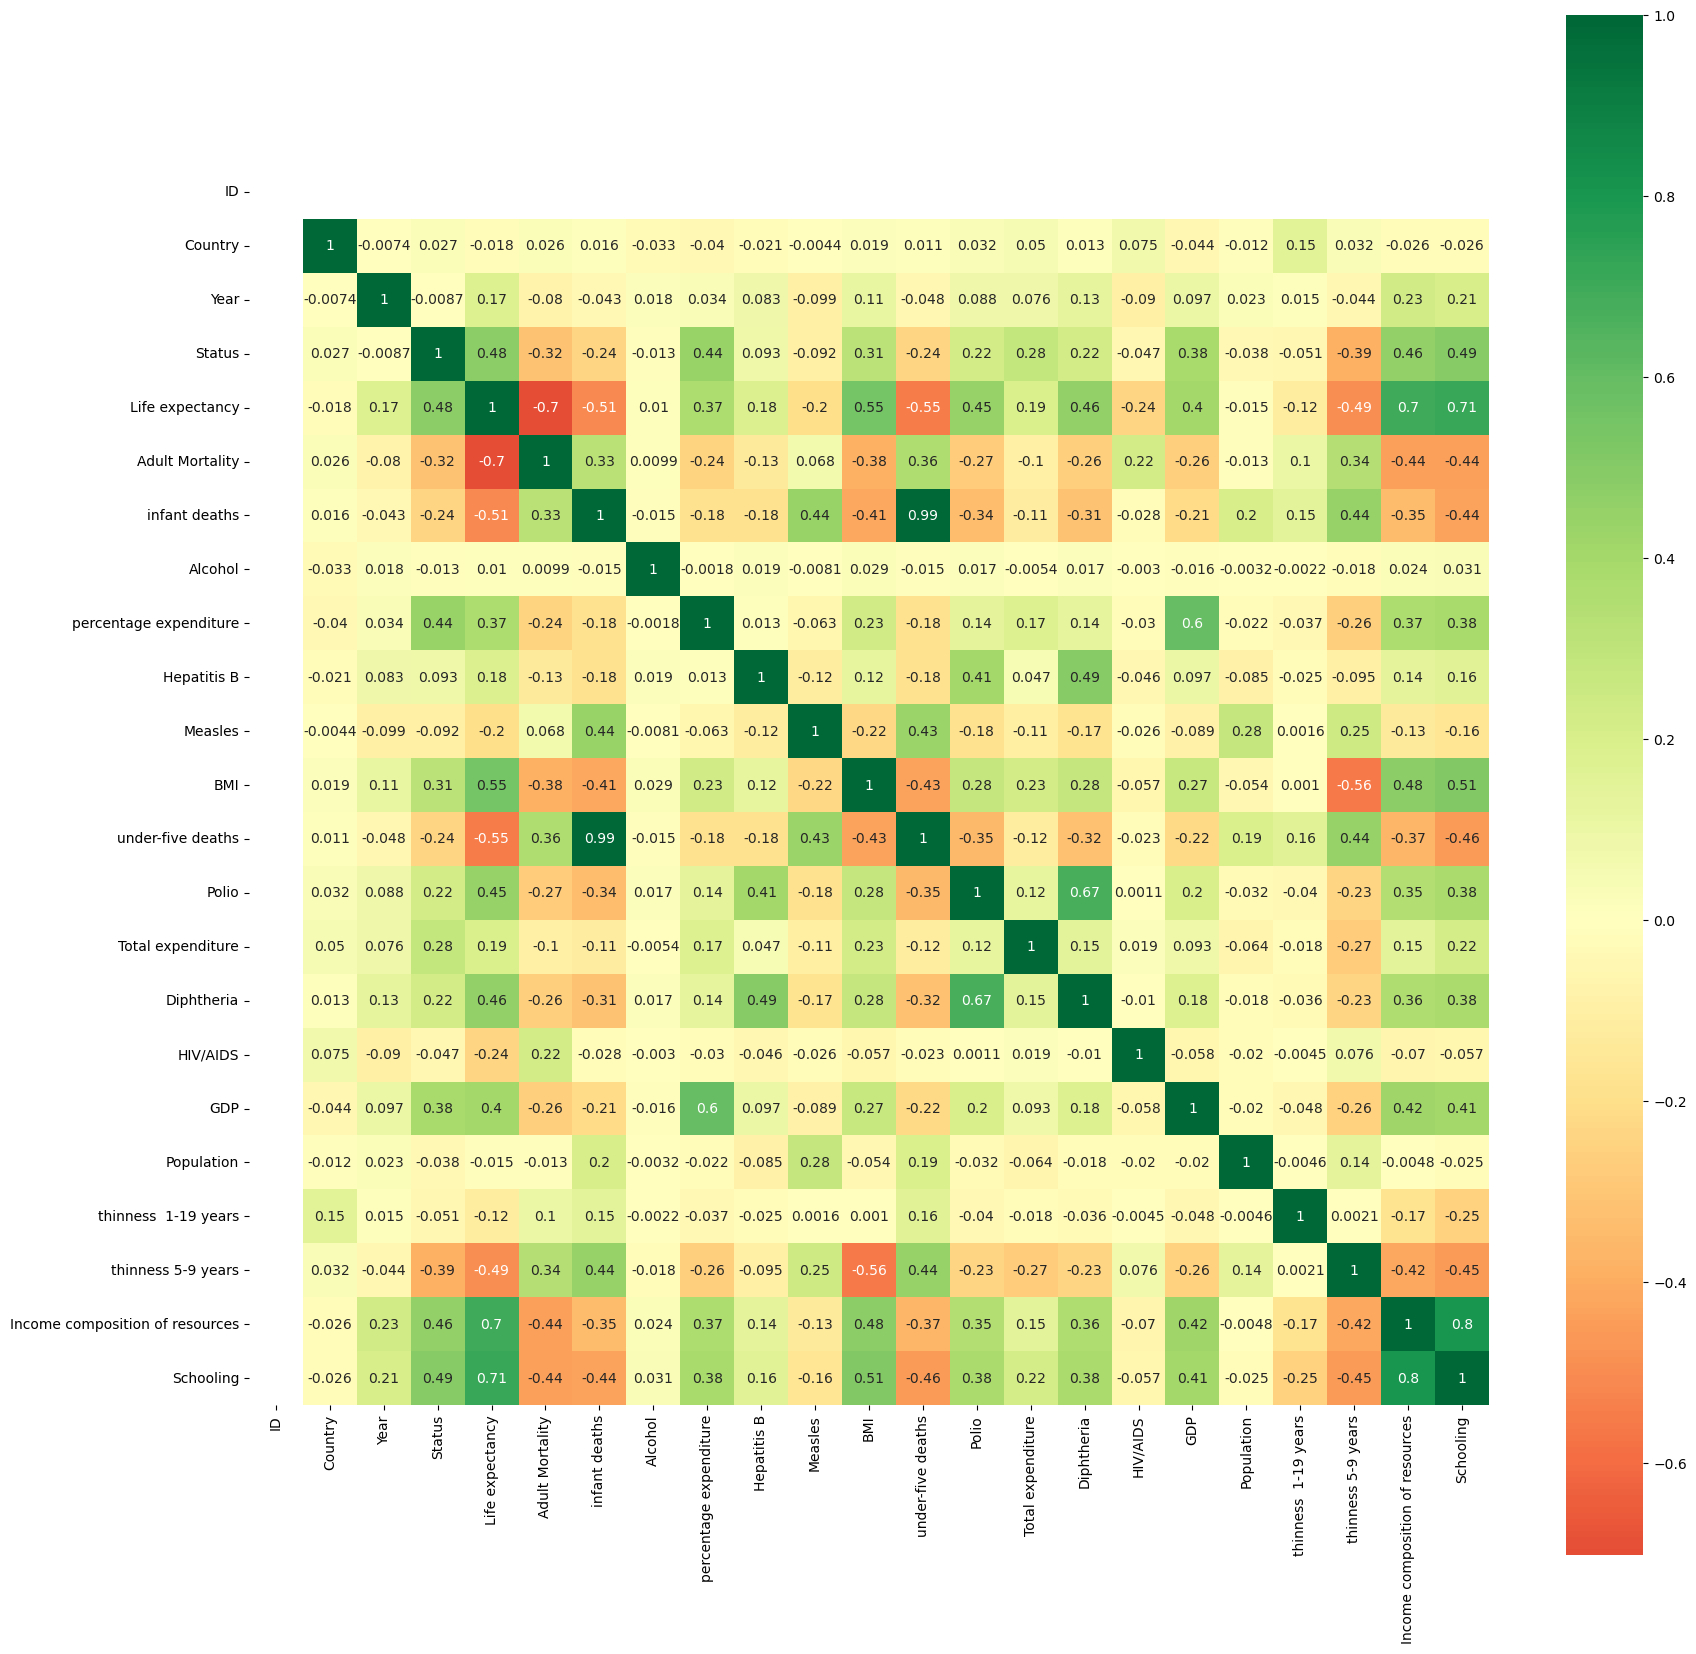

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [75]:
train['avg_thinness'] = (train['thinness  1-19 years'] + train['thinness 5-9 years'])/2

In [81]:
train = train.drop('thinness 1-19 years', axis=1)
train = train.drop("thinness 5-9 years", axis=1)
train = train.drop("Income composition of resources", axis=1)

KeyError: "['thinness 1-19 years'] not found in axis"

In [83]:
train['deaths'] = (train["infant deaths"] + train["under-five deaths"])/2

In [86]:
train = train.drop("infant deaths", axis=1)
train = train.drop("under-five deaths", axis=1)

KeyError: "['infant deaths'] not found in axis"

<Axes: >

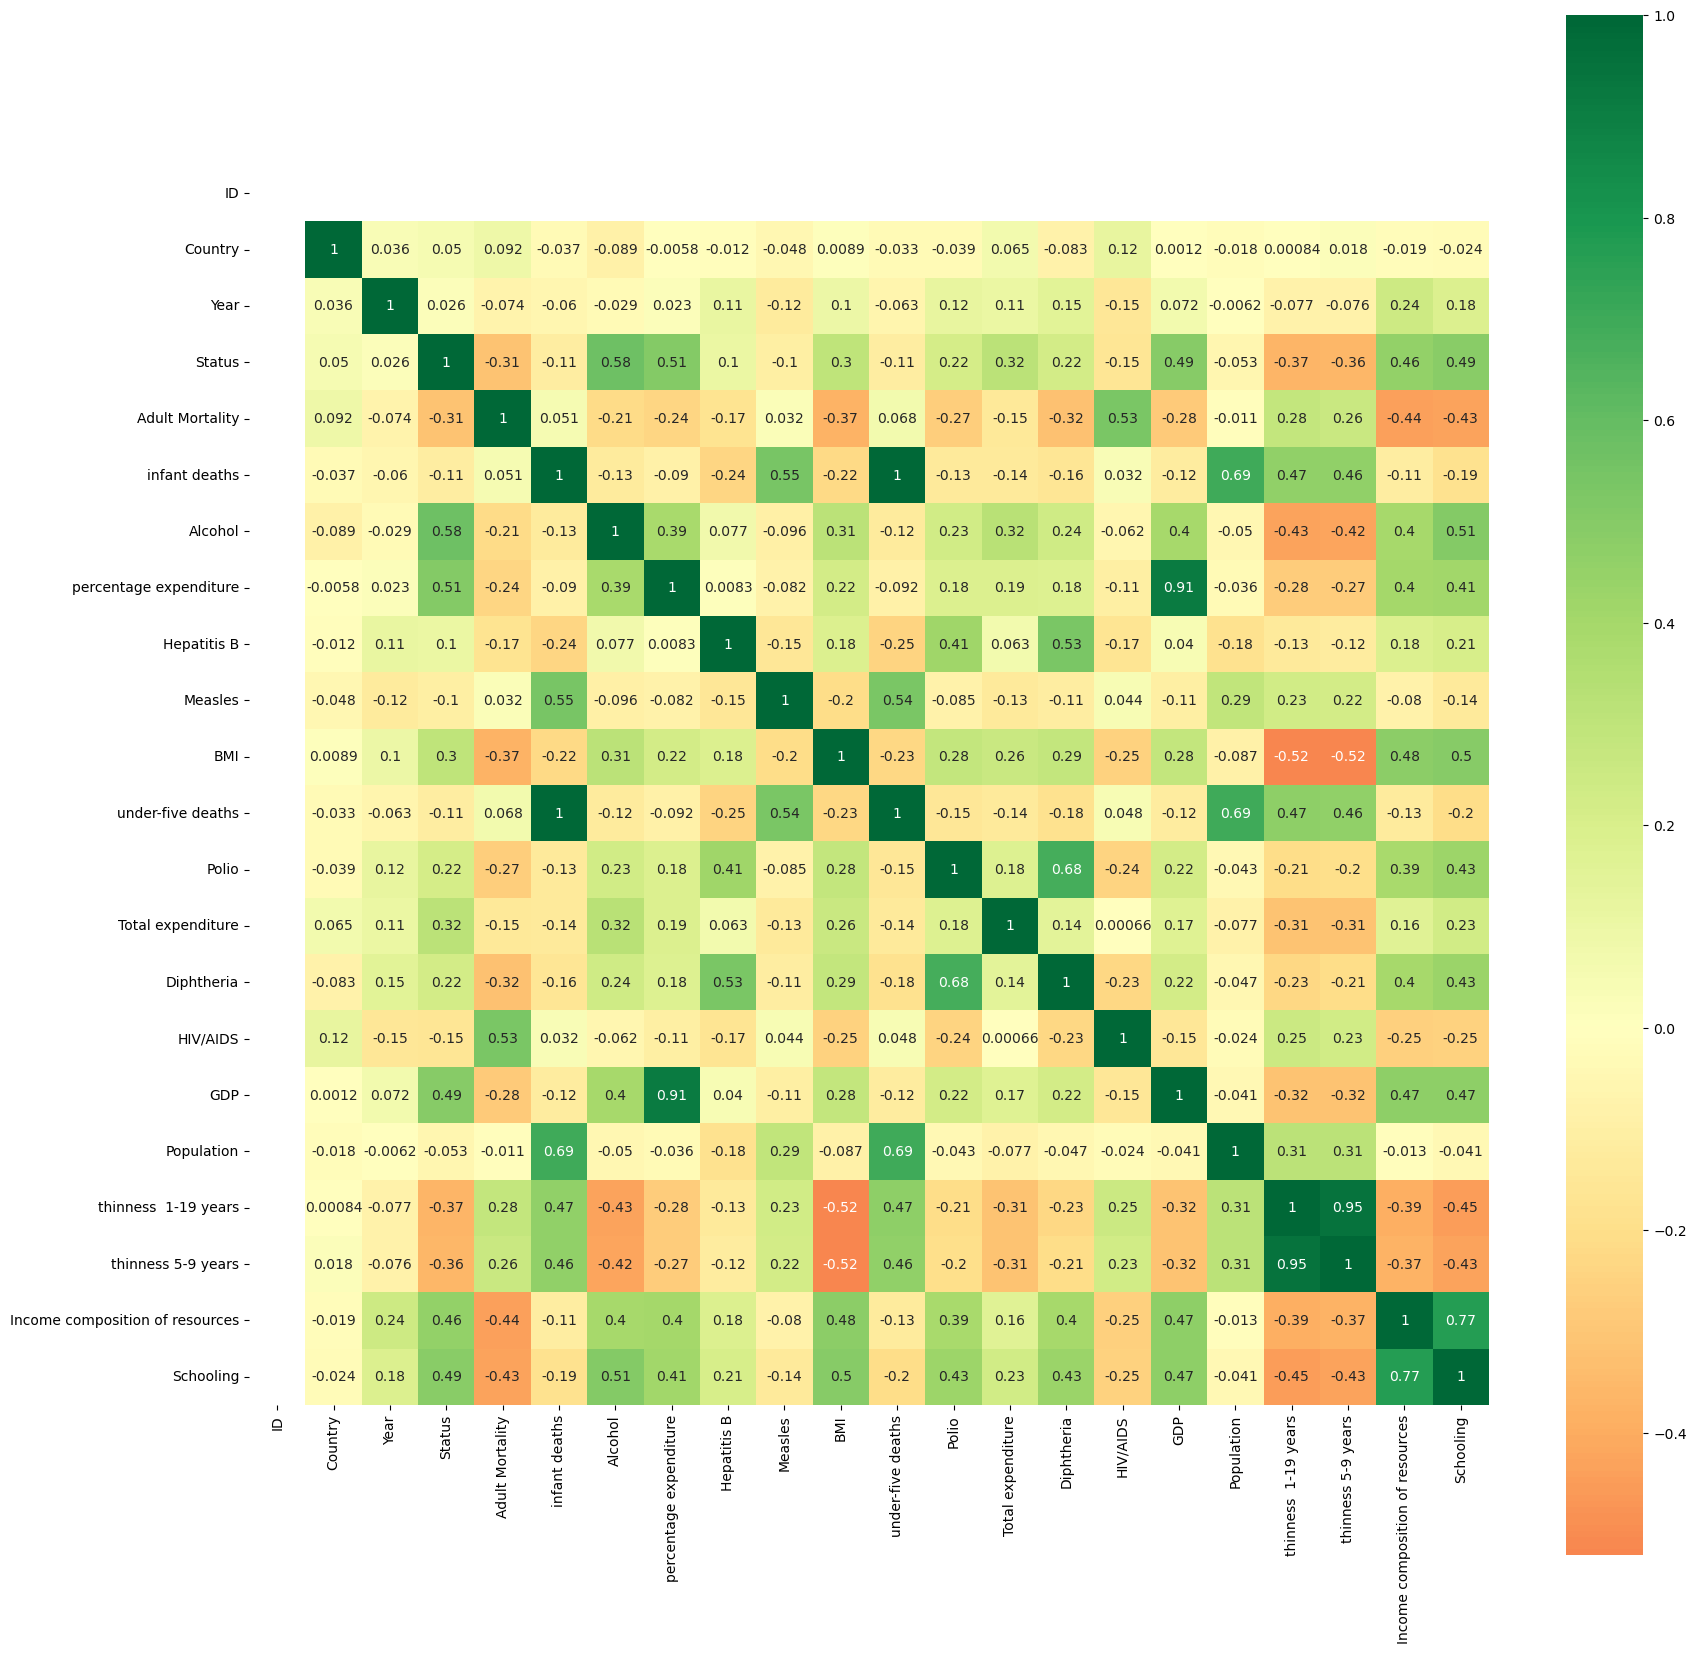

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(test.corr(), annot=True, cmap= 'RdYlGn', center=0,square=True)

In [90]:
from sklearn.model_selection import train_test_split

x = train.drop(['ID','Life_expectancy'], axis=1)
y = train['Life expectancy']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

KeyError: "['Life_expectancy'] not found in axis"

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
model =LinearRegression()

In [173]:
model.fit(X_train,y_train)

LinearRegression()

In [174]:
y_pred = model.predict(X_train)

In [175]:
from sklearn.metrics import r2_score, mean_squared_error

In [176]:
r2_score(y_train,y_pred)

0.7909593707788012

In [177]:
y_test_pred = model.predict(X_test)

In [178]:
r2_score(y_test,y_test_pred)

0.7830137085776707

In [179]:
mean_squared_error(y_train,y_pred)

19.245852720442695

In [180]:
mean_squared_error(y_test,y_test_pred)

19.46019655606307

In [181]:
sample = pd.read_csv("sample_submission.csv")

In [182]:
sample.head()

ID  Life expectancy
0  Sy75324907                0
1  Cr10129453                0
2  Mo67025598                0
3  Ba38246112                0
4  Ke57254548                0

In [183]:
out = reg.predict(test.drop('ID', axis= 1))

In [184]:
sample["Life expectancy"] = out

In [185]:
sample.head()

ID  Life expectancy
0  Sy75324907       142.594172
1  Cr10129453        78.472782
2  Mo67025598       118.873058
3  Ba38246112         1.776904
4  Ke57254548       104.872692

In [187]:
sample.to_csv("submission002.csv", index=False)